# Objective

To illustrate a typical workflow for a regression problem.

However, some mistakes were made here on purpose. Can you spot them?

## Preliminaries


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Data

In [ ]:
airbnb_df = pd.read_csv("/content/drive/MyDrive/AI-ML/supervised-learning-revision/Day1/data/AB_NYC_2019.csv")

# Exploratory

In [ ]:
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
airbnb_df.shape

(48895, 16)

## Handling missing values

In [ ]:
(airbnb_df.isnull()
          .sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
(airbnb_df.id
          .unique()
          .size)

48895

In [ ]:
(airbnb_df.loc[:, ["last_review", "reviews_per_month"]]
          .isnull())

,last_review,reviews_per_month
0,False,False
1,False,False
2,True,True
3,False,False
4,False,False
...,...,...
48890,True,True
48891,True,True
48892,True,True
48893,True,True


In [ ]:
(airbnb_df.loc[:, ["last_review", "reviews_per_month"]]
          .isnull()
          .query('last_review == reviews_per_month')
          .shape)

(48895, 2)

In [ ]:
(airbnb_df.loc[:, ["number_of_reviews", "last_review", "reviews_per_month"]]
          .isnull()
          .query('last_review == reviews_per_month')
          .query('number_of_reviews == 0')
          .shape)

(48895, 3)

In [ ]:
columns_to_drop = ['id', 'name', 'host_id', 'host_name',
                   'last_review']

In [ ]:
airbnb_cleaned_df = (airbnb_df.drop(columns_to_drop, axis=1)
                              .fillna(value={'reviews_per_month': 0}))

In [ ]:
(airbnb_cleaned_df.isnull()
                  .sum())

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
airbnb_cleaned_df.shape

(48895, 11)

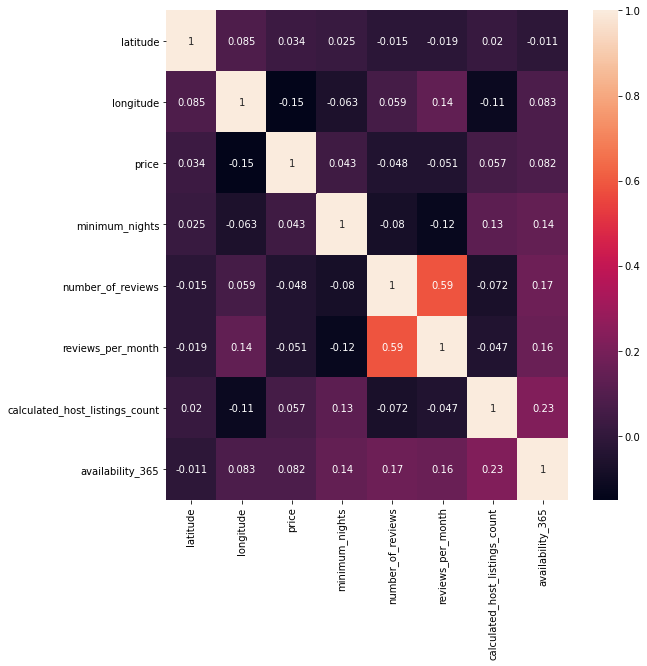

In [ ]:
plt.figure(figsize=(9, 9))
sns.heatmap(airbnb_cleaned_df.corr(),
            annot=True)

# Transformations

In [ ]:
airbnb_cleaned_df.dtypes

neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
(airbnb_cleaned_df.neighbourhood_group
                  .value_counts())

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [ ]:
(airbnb_cleaned_df.neighbourhood
                  .value_counts())

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Willowbrook              1
New Dorp                 1
Rossville                1
Fort Wadsworth           1
Woodrow                  1
Name: neighbourhood, Length: 221, dtype: int64

In [ ]:
(airbnb_cleaned_df.room_type
                  .value_counts())

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [ ]:
airbnb_X, airbnb_y = airbnb_cleaned_df.drop('price', axis=1), airbnb_cleaned_df.price

In [ ]:
ct = ColumnTransformer([('scale', StandardScaler(),
                         make_column_selector(dtype_include=np.number)),
                        ('onehot', OneHotEncoder(handle_unknown='ignore'),
                         make_column_selector(dtype_include=object))])

In [ ]:
airbnb_Xtrain, airbnb_Xtest, airbnb_ytrain, airbnb_ytest = train_test_split(airbnb_X,
                                                                            airbnb_y,
                                                                            test_size=0.2,
                                                                            random_state=20130810)

In [ ]:
airbnb_Xtrain = ct.fit_transform(airbnb_Xtrain)

In [ ]:
airbnb_Xtest = ct.transform(airbnb_Xtest)

## Model

## Linear Regression

In [ ]:
learner_lm = LinearRegression()

In [ ]:
learner_lm.fit(airbnb_Xtrain, airbnb_ytrain)

## Polynomial Features

In [ ]:
poly_degrees = [2, 3]
training_errors, validation_errors = [], []

In [ ]:
%%time
for poly_degree in poly_degrees:

  airbnb_X, airbnb_y = (airbnb_cleaned_df.drop('price', axis=1), 
                        airbnb_cleaned_df.price)
  
  ct = ColumnTransformer([('scale', StandardScaler(),
                           make_column_selector(dtype_include=np.number)),
                          ('onehot', OneHotEncoder(handle_unknown='ignore'),
                           make_column_selector(dtype_include=object))])
  
  airbnb_Xtrain, airbnb_Xtest, airbnb_ytrain, airbnb_ytest = train_test_split(airbnb_X,
                                                                              airbnb_y,
                                                                              test_size=0.2,
                                                                              random_state=20130810)
  airbnb_Xtrain = ct.fit_transform(airbnb_Xtrain)

  airbnb_Xtest = ct.transform(airbnb_Xtest)

  polynomial_features = PolynomialFeatures(degree=poly_degree)
  
  airbnb_X_polyfeatures = polynomial_features.fit_transform(airbnb_Xtrain)

  airbnb_Xtrain, airbnb_Xvalid, airbnb_ytrain, airbnb_yvalid = train_test_split(airbnb_X_polyfeatures,
                                                                                airbnb_ytrain,
                                                                                test_size=0.2,
                                                                                random_state=20130810)
  
  learner_lm = LinearRegression(fit_intercept=False)

  learner_lm.fit(airbnb_Xtrain, airbnb_ytrain)

  training_errors.append(mean_squared_error(airbnb_ytrain, 
                                            learner_lm.predict(airbnb_Xtrain)))
  
  validation_errors.append(mean_squared_error(airbnb_yvalid,
                                              learner_lm.predict(airbnb_Xvalid)))

CPU times: user 27min 3s, sys: 19min 8s, total: 46min 11s
Wall time: 23min 33s


In [ ]:
poly_degrees

[1, 2, 3]

In [ ]:
training_errors

[51028.610227981844, 51028.610227981844, 45980.70486510112, 35496.26918733579]

In [ ]:
validation_errors

[57291.87327148215, 80578.74636898506, 30004632.857034672]

# Summary

Vanilla regression models can be limiting. Be careful of unintended data leaks